In [13]:
import os
import pandas as pd
import matplotlib.pyplot as plt
from dotenv import load_dotenv
import spotipy
from spotipy.oauth2 import SpotifyClientCredentials

In [7]:
# Cargar las variables de entorno
load_dotenv()


True

In [8]:
# Conexión con spotify
con = spotipy.Spotify(auth_manager= SpotifyClientCredentials(os.environ.get("CLIENT_ID"), client_secret= os.environ.get("CLIENT_SECRET")))
con

In [9]:
artist_id = "3TVXtAsR1Inumwj472S9r4"
response = con.artist_top_tracks(artist_id)
if response:
    tracks = response["tracks"]
tracks 

[{'album': {'album_type': 'album',
   'artists': [{'external_urls': {'spotify': 'https://open.spotify.com/artist/3TVXtAsR1Inumwj472S9r4'},
     'href': 'https://api.spotify.com/v1/artists/3TVXtAsR1Inumwj472S9r4',
     'id': '3TVXtAsR1Inumwj472S9r4',
     'name': 'Drake',
     'type': 'artist',
     'uri': 'spotify:artist:3TVXtAsR1Inumwj472S9r4'}],
   'available_markets': ['AR',
    'AU',
    'AT',
    'BE',
    'BO',
    'BR',
    'BG',
    'CA',
    'CL',
    'CO',
    'CR',
    'CY',
    'CZ',
    'DK',
    'DO',
    'DE',
    'EC',
    'EE',
    'SV',
    'FI',
    'FR',
    'GR',
    'GT',
    'HN',
    'HK',
    'HU',
    'IS',
    'IE',
    'IT',
    'LV',
    'LT',
    'LU',
    'MY',
    'MT',
    'MX',
    'NL',
    'NZ',
    'NI',
    'NO',
    'PA',
    'PY',
    'PE',
    'PH',
    'PL',
    'PT',
    'SG',
    'SK',
    'ES',
    'SE',
    'CH',
    'TW',
    'TR',
    'UY',
    'US',
    'GB',
    'AD',
    'LI',
    'MC',
    'ID',
    'JP',
    'TH',
    'VN',
    'RO',

In [10]:
# List comprehension mete los valores del diccionario indicando k, key, donde el valor de ese key lo divide entre 1000*60 porque la música está en miliseundos
# luego calcula el módulo para llevar el valor a sólo segundos si es que el valor está en ms
tracks_clean = [{k: (v/(1000*60))%60 if k== "duration_ms" else v for k,v in track.items() if k in ["name", "popularity", "duration_ms"] } for track in tracks]

In [11]:
# Duración, tiempo y nombre de la canción 
df_tracks = pd.DataFrame(tracks_clean)
df_tracks

,duration_ms,name,popularity
0,2.899767,One Dance,85
1,3.164883,WAIT FOR U (feat. Drake & Tems),82
2,3.316217,God's Plan,81
3,4.982333,Passionfruit,80
4,3.639400,Jimmy Cooks (feat. 21 Savage),80
5,2.105933,Circadian Rhythm,79
6,2.285700,No Face,79
7,5.319850,Rich Baby Daddy (feat. Sexyy Red & SZA),79
8,4.852917,Fair Trade (with Travis Scott),78
9,4.633333,It's Up (feat. Young Thug & 21 Savage),77


In [12]:
df1 = pd.DataFrame([{k: v for k, v in d.items()} for d in tracks_clean])
df1

,duration_ms,name,popularity
0,2.899767,One Dance,85
1,3.164883,WAIT FOR U (feat. Drake & Tems),82
2,3.316217,God's Plan,81
3,4.982333,Passionfruit,80
4,3.639400,Jimmy Cooks (feat. 21 Savage),80
5,2.105933,Circadian Rhythm,79
6,2.285700,No Face,79
7,5.319850,Rich Baby Daddy (feat. Sexyy Red & SZA),79
8,4.852917,Fair Trade (with Travis Scott),78
9,4.633333,It's Up (feat. Young Thug & 21 Savage),77


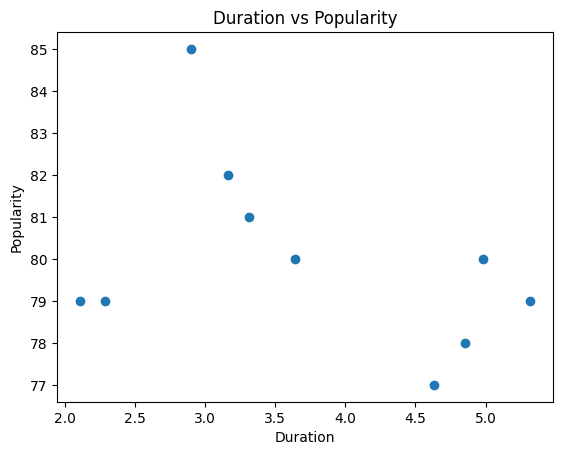

In [14]:
# ¿Tiene relación la duración con la popularidad? ¿Podríamos decir que una canción que dure poco tiempo puede ser más popular que otra que dure más? Analízalo graficando un scatter plot y argumenta tu respuesta.

# Crear el scatter plot
plt.scatter(df1["duration_ms"], df1["popularity"])

# Etiquetas y título
plt.xlabel("Duration")
plt.ylabel("Popularity")
plt.title("Duration vs Popularity")

# Mostrar el gráfico
plt.show()

# Conclusión
Aunque hay una canción de poca duración que es muy popular, no parece haber una correlación clara entre estas varialbes ya que pueden haber otros factores que influyan en la popularidad de las canciones. Podemos decir que las canciones entre 3 y 4 minutos pueden ser tienen ligeramente más probabilidad de ser populares.